In [1]:
import pandas as pd
df = pd.read_csv(
    parse_dates=['date'],
    filepath_or_buffer='/kaggle/input/banks-customer-reviews-dataset/bank_reviews3.csv').drop(columns=['bank_image'])
df['review length'] = df['review'].str.len()
df.head()

,author,date,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,review length
0,AMRENDRA T,2020-03-21,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133,255
1,BISHWA,2020-03-20,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89,247
2,SANTOSH,2020-03-20,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48,277
3,MAHADEV,2020-03-20,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52,268
4,R,2020-03-20,Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22,253


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   author                996 non-null    object        
 1   date                  1000 non-null   datetime64[ns]
 2   address               1000 non-null   object        
 3   bank                  1000 non-null   object        
 4   rating                1000 non-null   float64       
 5   review_title_by_user  1000 non-null   object        
 6   review                1000 non-null   object        
 7   rating_title_by_user  1000 non-null   object        
 8   useful_count          1000 non-null   int64         
 9   review length         1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 78.2+ KB


In [3]:
from plotly.express import bar
bar(data_frame=df['bank'].value_counts().to_frame().reset_index(), x='bank', y='count')

It looks like we have some noise in our bank name column.

In [4]:
bar(data_frame=df['address'].value_counts().to_frame().reset_index(),
    x='address', y='count', log_y=True)

Our address/location data looks a bit like a population map of India.

In [5]:
from plotly.express import imshow
imshow(img=df[['rating', 'useful_count', 'review length']].corr())

There is really no correlation between the rating value, how useful it is, or how long it is. I think if we were going to build a model we would want the target variable to be the useful count, but we don't really have much to go on.

In [6]:
from plotly.express import scatter
scatter(data_frame=df, x='date', y='useful_count', color='rating', log_y=True, hover_name='author')

In [7]:
scatter(data_frame=df, x='review length', y='useful_count', color='rating', log_y=True, hover_name='author')

In [8]:
from plotly.express import line
line(data_frame=df.groupby(by='date').size().reset_index(), x='date', y=0)

In [9]:
from plotly.express import scatter
scatter(data_frame=df.groupby(by='date').size().reset_index(), x='date', y=0, trendline='ols')

Our trendline is basically flat; what does our mean look like?

In [10]:
df.groupby(by='date').size().reset_index()[0].mean()

9.090909090909092

Our dataset averages 9.1 reviews per day. That seems like a lot.

(-0.5, 1199.5, 1199.5, -0.5)

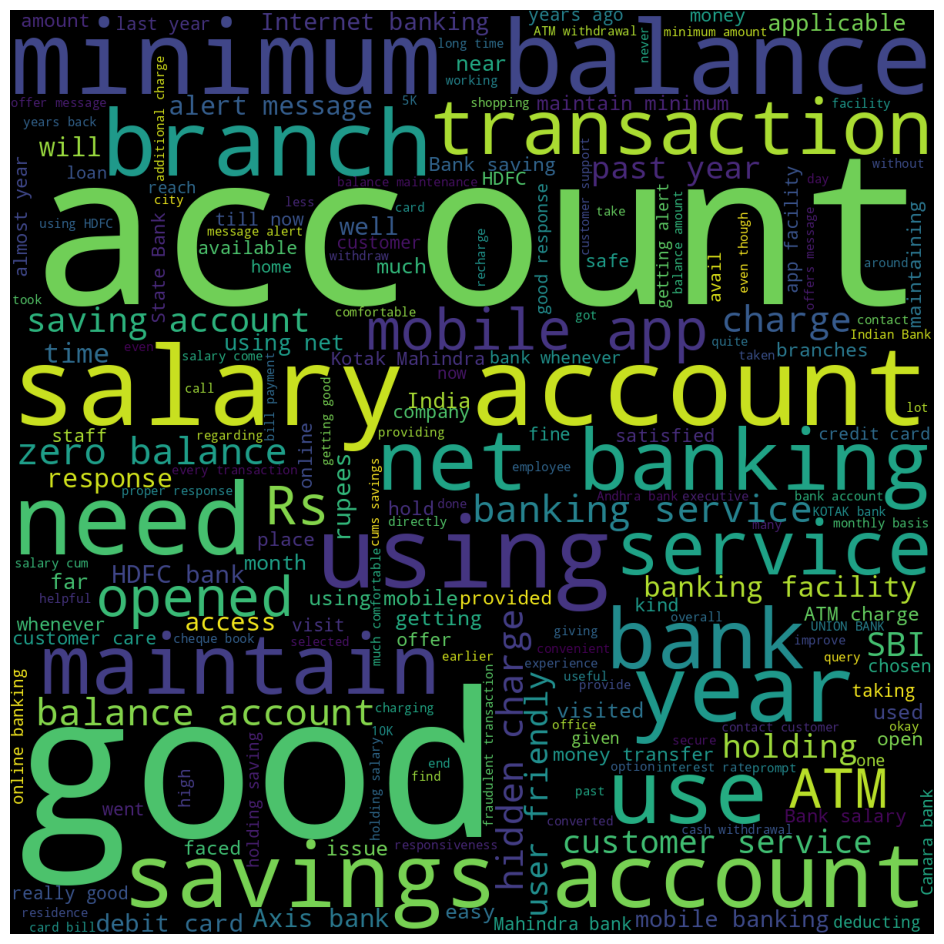

In [11]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(df['review'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')